In [1]:
import csv

import numpy as np
import matplotlib.pyplot as plt

## Question 1 code

In [2]:
R_s = 6
V_in = 25
I_in = V_in/R_s

Text(0.5, 1.0, 'I_out vs V_out')

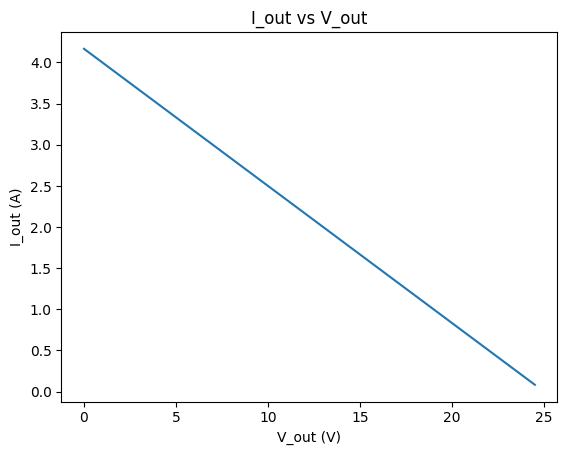

In [3]:
V_out = np.arange(0, 25, 0.5)
I_out = (25 - V_out)/6

fig, ax = plt.subplots()
ax.plot(V_out, I_out)
ax.set_xlabel('V_out (V)')
ax.set_ylabel('I_out (A)')
ax.set_title('I_out vs V_out')


In [4]:
p = (25 - V_out) * V_out / 6

max_idx = np.argmax(p)
power_max = np.max(p)
print(max_idx, power_max)
print(I_out[max_idx], V_out[max_idx])

25 26.041666666666668
2.0833333333333335 12.5


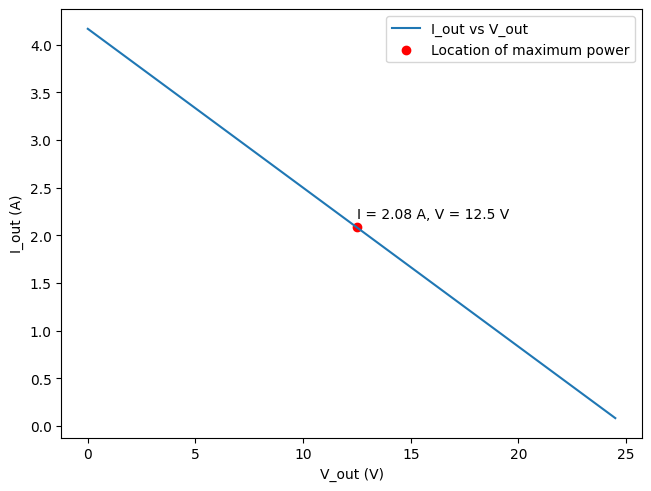

In [5]:
fig, ax = plt.subplots(layout='constrained')
ax.plot(V_out, I_out, label='I_out vs V_out')
ax.scatter(V_out[max_idx], I_out[max_idx], label='Location of maximum power', color='red')
ax.annotate(
    'I = {0:0.2f} A, V = {1:0.1f} V'.format(round(I_out[max_idx], 2), round(V_out[max_idx], 1)),
    (V_out[max_idx], I_out[max_idx]+0.1)
)
ax.set_xlabel('V_out (V)')
ax.set_ylabel('I_out (A)')
ax.legend()


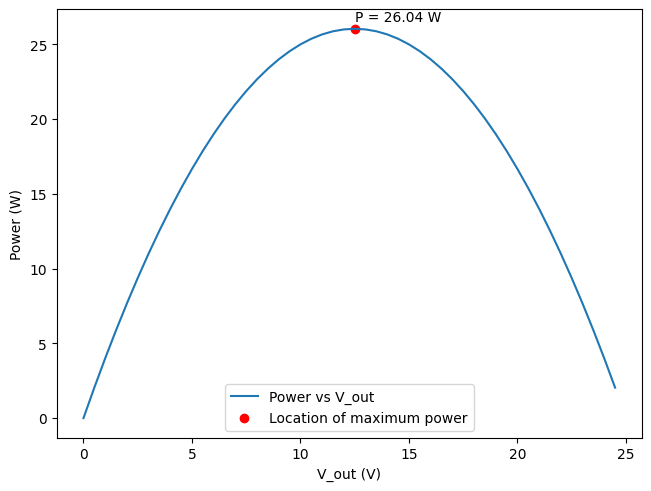

In [6]:
fig, ax = plt.subplots(layout='constrained')

ax.plot(V_out, p, label='Power vs V_out')
ax.scatter(V_out[max_idx], p[max_idx], label='Location of maximum power', color='red')
ax.annotate('P = {0:0.2f} W'.format(round(p[max_idx], 2)), (V_out[max_idx], p[max_idx]+0.5))
ax.set_xlabel('V_out (V)')
ax.set_ylabel('Power (W)')
ax.legend()

## Question 5 Code

# Parameters for 3 cases
1. Aug 5: tilt = 15.9°
2. Feb 9: tilt = 47.94°
3. Aug 5 west facing: tilt = 32.81°



In [7]:
def read_monthly_csv(file_path):
    data_rows = []
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        is_data_row = False
        
        for row in reader:
            if is_data_row:
                data = [float(i) for i in row[1:]] # skip first column of months
                data_rows.append(data) 
            else:
                if len(row) > 0 and row[0] == 'Month':
                    is_data_row = True

    array = np.array(data_rows).T
    return array

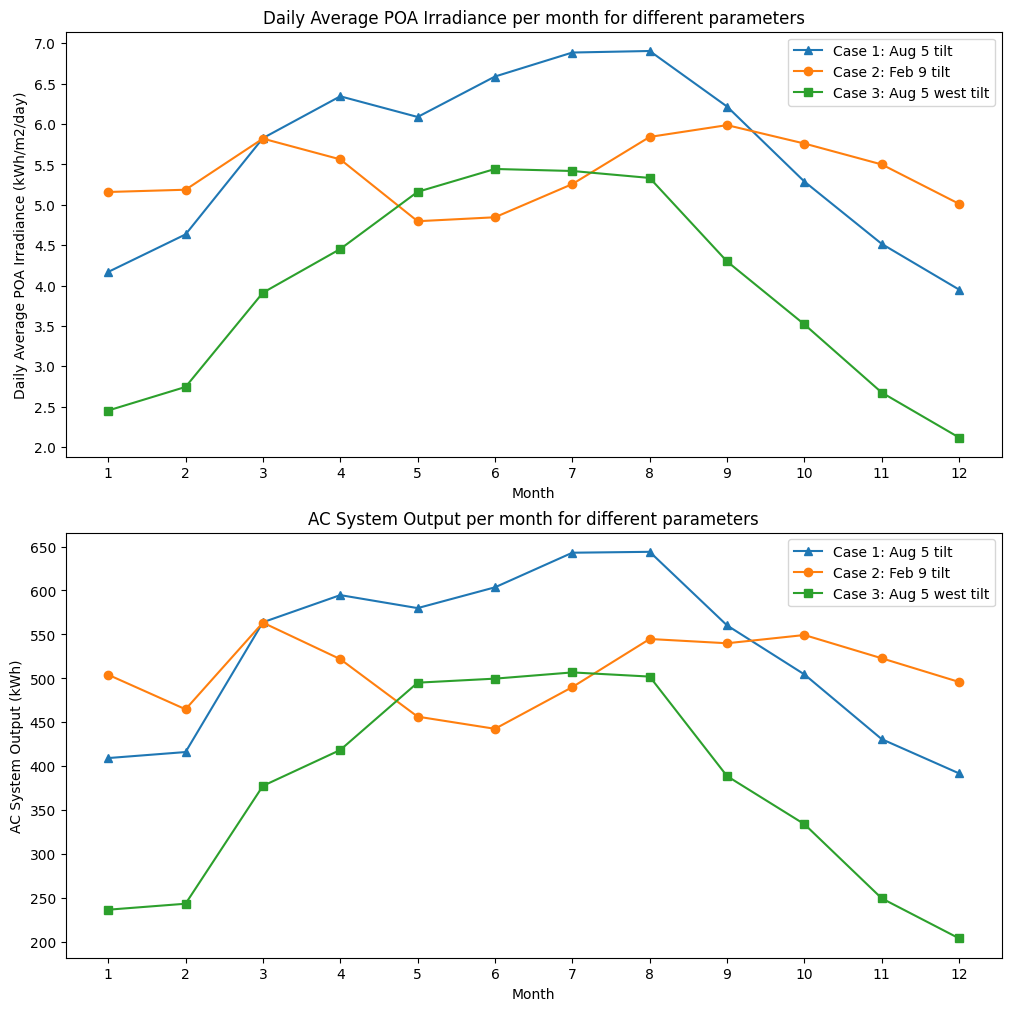

In [8]:
a1 = read_monthly_csv('pvwatts_monthly0805.csv')
a2 = read_monthly_csv('pvwatts_monthly0209.csv')
a3 = read_monthly_csv('pvwatts_monthly0805_west.csv')


fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10), layout='constrained')

# irradiance
ax1.plot(a1[0], marker='^', label='Case 1: Aug 5 tilt')
ax1.plot(a2[0], marker='o', label='Case 2: Feb 9 tilt')
ax1.plot(a3[0], marker='s', label='Case 3: Aug 5 west tilt')

ax1.set_title('Daily Average POA Irradiance per month for different parameters')
ax1.set_yticks(np.arange(2, 7.5, 0.5))
ax1.set_ylabel('Daily Average POA Irradiance (kWh/m2/day)')
ax1.set_xticks(np.arange(12), np.arange(12)+1)
ax1.set_xlabel('Month')
ax1.legend()


# AC output
ax2.plot(a1[2], marker='^', label='Case 1: Aug 5 tilt')
ax2.plot(a2[2], marker='o', label='Case 2: Feb 9 tilt')
ax2.plot(a3[2], marker='s', label='Case 3: Aug 5 west tilt')

ax2.set_title('AC System Output per month for different parameters')
ax2.set_yticks(np.arange(200, 700, 50))
ax2.set_ylabel('AC System Output (kWh)')
ax2.set_xticks(np.arange(12), np.arange(12)+1)
ax2.set_xlabel('Month')
ax2.legend()

In [9]:
def read_hourly_csv(file_path, month, day):
    data_rows = []
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        is_data_row = False
        
        for row in reader:
            if is_data_row:
                if int(row[0]) == month and int(row[1]) == day:
                    data = [float(i) for i in row[3:]] # skip first 3 column of months, days, and hours
                    data_rows.append(data)
                elif int(row[0]) > month:
                    break
            else:
                if len(row) > 0 and row[0] == 'Month':
                    is_data_row = True

    array = np.array(data_rows).T
    return array

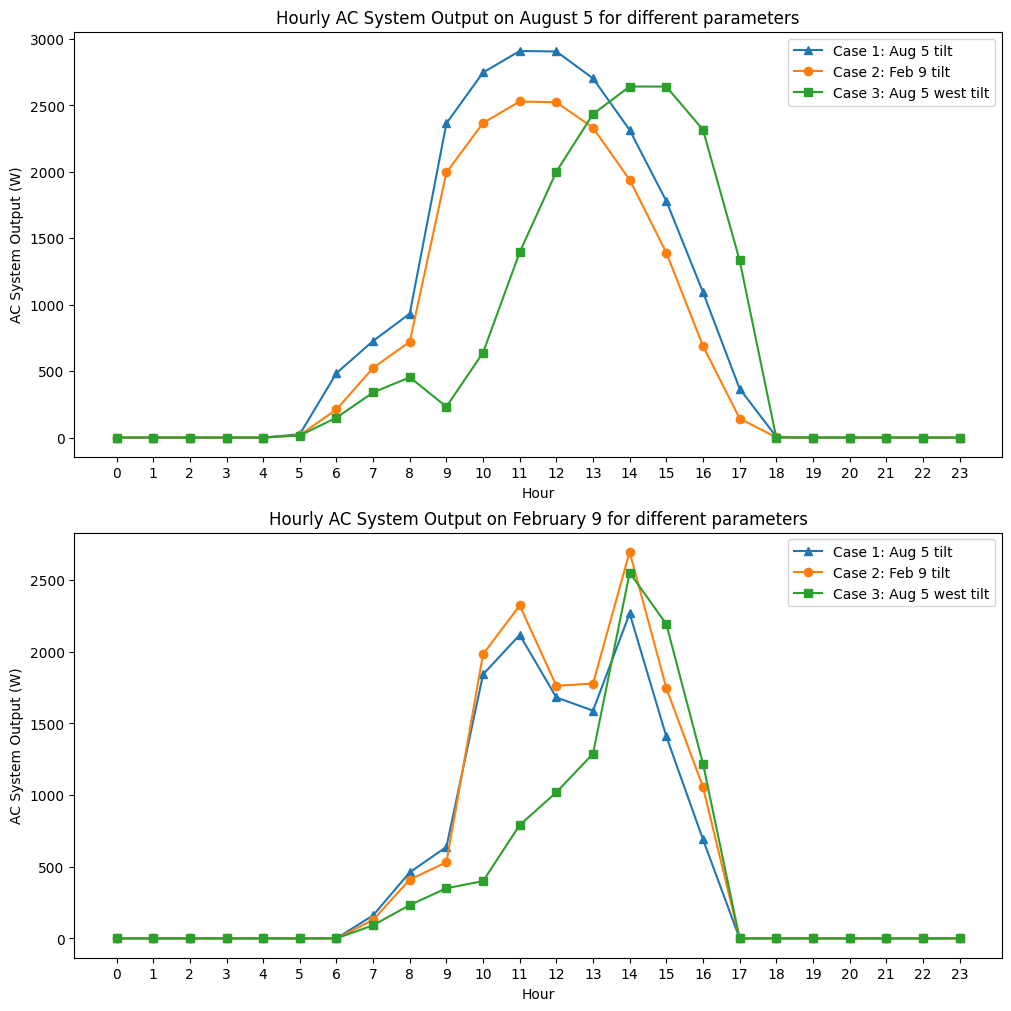

In [10]:
b1 = read_hourly_csv('pvwatts_hourly0805.csv', 8, 5)
b2 = read_hourly_csv('pvwatts_hourly0209.csv', 8, 5)
b3 = read_hourly_csv('pvwatts_hourly0805_west.csv', 8, 5)

c1 = read_hourly_csv('pvwatts_hourly0805.csv', 2, 9)
c2 = read_hourly_csv('pvwatts_hourly0209.csv', 2, 9)
c3 = read_hourly_csv('pvwatts_hourly0805_west.csv', 2, 9)

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10), layout='constrained')

ax1.plot(b1[-1], marker='^', label='Case 1: Aug 5 tilt')
ax1.plot(b2[-1], marker='o', label='Case 2: Feb 9 tilt')
ax1.plot(b3[-1], marker='s', label='Case 3: Aug 5 west tilt')

ax1.set_title('Hourly AC System Output on August 5 for different parameters')
ax1.set_ylabel('AC System Output (W)')
ax1.set_xticks(np.arange(24), np.arange(24))
ax1.set_xlabel('Hour')
ax1.legend()

ax2.plot(c1[-1], marker='^', label='Case 1: Aug 5 tilt')
ax2.plot(c2[-1], marker='o', label='Case 2: Feb 9 tilt')
ax2.plot(c3[-1], marker='s', label='Case 3: Aug 5 west tilt')

ax2.set_title('Hourly AC System Output on February 9 for different parameters')
ax2.set_ylabel('AC System Output (W)')
ax2.set_xticks(np.arange(24), np.arange(24))
ax2.set_xlabel('Hour')
ax2.legend()
